In [1]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pandas as pd
import numpy as np

Using TensorFlow backend.


# Tried X input 1 output method and iterated in a for loop to get the predictions

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
raw_seq = pd.read_csv("/content/drive/My Drive/Colab Notebooks/JanathaHack/Demand Forecasting/train.csv")
raw_seq = raw_seq["units_sold"].values.tolist()
submit = pd.read_csv("/content/drive/My Drive/Colab Notebooks/JanathaHack/Demand Forecasting/sample_submission.csv")

In [ ]:
n_steps = 2310
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
n_seq = 2
n_steps = int(n_steps/2)
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [ ]:
0-2310 (2311)
1-2311 (2312) 

In [ ]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]


# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(150, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_7 (TimeDist (None, None, 1155, 128)   256       
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 577, 128)    0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 73856)       0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               44404200  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 44,404,607
Trainable params: 44,404,607
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(X, y, epochs=2, verbose=1)

Epoch 1/2
147840/147840 [==============================] - 349s 2ms/step - loss: 4986.5851
Epoch 2/2
147840/147840 [==============================] - 349s 2ms/step - loss: 2678.7172


In [ ]:
2728.9807 epoch 2

In [ ]:
import numpy as np
x_input=np.array(raw_seq[-2310:])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
predictions=[]
next_preds=13860
for _ in range(next_preds):
  pred=model.predict(x_input)
  predictions.append(pred)
  # print(x_input,"and",pred)
  x_input = np.append(x_input,pred)
  x_input = x_input[-2310:]
  x_input = x_input.reshape((1, n_seq, n_steps, n_features))

In [ ]:
finalpreds = np.array(predictions).reshape(-1,1)

In [ ]:
submit["units_sold"] = finalpreds


In [ ]:
submit

,record_ID,units_sold
0,212645,52.138020
1,212646,65.255440
2,212647,45.972900
3,212648,52.067749
4,212649,47.271549
...,...,...
13855,232281,30.510632
13856,232282,30.513475
13857,232285,30.517057
13858,232286,30.521082


In [ ]:
submit.to_csv("resubmit.csv",index=False)

In [ ]:
x_input=np.array(raw_seq[-1156:])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
pred=model.predict(x_input)

In [ ]:
pred

array([[52.13802]], dtype=float32)

In [ ]:
np.array(predictions).reshape(-1,1).reshape(1,-1)

array([[52.13802 , 65.25544 , 45.9729  , ..., 30.517057, 30.521082,
        30.52543 ]], dtype=float32)

# Did not implement this... but just to give an idea of how m inputs n outputs looks like.

In [6]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
# univariate cnn lstm example
from numpy import array
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Bidirectional
from keras.layers import Flatten,Dropout
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
import pandas as pd
raw_seq = pd.read_csv("/content/drive/My Drive/Colab Notebooks/JanathaHack/Demand Forecasting/train.csv")
raw_seq = raw_seq["units_sold"].values.tolist()
flat_list = raw_seq.copy()

In [21]:
#-------------------
#TrainTestSplit
split_time=1150
x_train = flat_list[:split_time]
x_valid = flat_list[split_time:]
x_valid=np.array(x_valid)

In [10]:
# choose a number of time steps
n_steps_in, n_steps_out = 1150, 1150
# split into samples
X, y = split_sequence(flat_list, n_steps_in, n_steps_out )

In [11]:
X

array([[ 20,  28,  19, ...,  40,  29,  17],
       [ 28,  19,  44, ...,  29,  17,  52],
       [ 19,  44,  52, ...,  17,  52,  69],
       ...,
       [ 15, 172,  61, ...,  10,  18,  22],
       [172,  61,  39, ...,  18,  22,  38],
       [ 61,  39,  75, ...,  22,  38,  25]])

In [12]:
y

array([[52, 69, 22, ..., 15, 43, 66],
       [69, 22,  7, ..., 43, 66, 28],
       [22,  7,  4, ..., 66, 28, 66],
       ...,
       [38, 25, 15, ..., 38, 30, 31],
       [25, 15, 35, ..., 30, 31, 12],
       [15, 35, 30, ..., 31, 12, 15]])

In [14]:
X.shape,y.shape

((147851, 1150), (147851, 1150))

In [15]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq =1
# n_steps = int(n_steps/2)
print(X[0])
print(X.shape)

X = X.reshape((X.shape[0], n_seq, X.shape[1], n_features))
print(X.shape)

[20 28 19 ... 40 29 17]
(147851, 1150)
(147851, 1, 1150, 1)


In [16]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=100, kernel_size=5, activation='relu'),
                          input_shape=(None, n_steps_in, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=10)))
model.add(TimeDistributed(Flatten()))
model.add((LSTM(100, activation='relu', return_sequences=True,
                kernel_regularizer=tf.keras.regularizers.l2(0.001))))
# model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(100, activation='relu',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))))
model.add(Dense(50))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.summary()
# fit model
model.fit(X, y, epochs=1, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 1146, 100)   600       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 114, 100)    0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 11400)       0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 100)         4600400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_2 (Dense)              (None, 1150)             

In [ ]:
# X[0].reshape(1,-1),y[0]

In [17]:
X.shape,np.array(x_valid[-n_steps_in:]).shape

((147851, 1, 1150, 1), (1150,))

In [20]:
len(x_train[-n_steps_in:])

602

In [22]:
#Validation 
x_input=np.array(x_train[-n_steps_in:]).reshape(1,n_steps_in)
x_input = x_input.reshape((x_input.shape[0], n_seq, x_input.shape[1], n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat.reshape(1,-1))

[[49.017952 50.513012 55.100853 ... 49.767815 54.3117   51.844906]]


In [23]:
yhat.shape

(1, 1150)

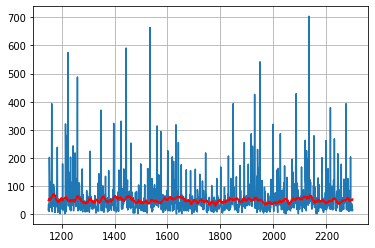

In [28]:
#Validation Check
import matplotlib.pyplot as plt
# plt.plot([x for x in range(0,500)],x_train,"g")
plt.plot([x for x in range(1150,2300)],x_valid[-1150:])
plt.plot([x for x in range(1150,2300)],yhat[0],"r")
plt.grid()

# With 1 epoch it started predicting mean... Cool!

In [29]:
# Real Prediction

x_input=np.array(raw_seq[-n_steps_in:]).reshape(1,n_steps_in)
x_input = x_input.reshape((x_input.shape[0], n_seq, x_input.shape[1], n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat.reshape(1,-1))

[[59.548435 62.77052  68.18003  ... 49.05239  55.623535 53.81018 ]]


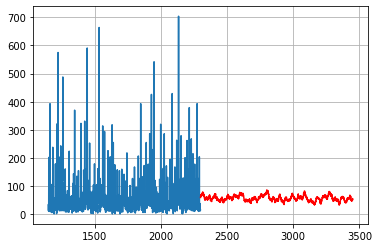

In [30]:
#Prediction Visualize
import matplotlib.pyplot as plt
# plt.plot([x for x in range(500,602)],x_train[500:],"g")
plt.plot([x for x in range(1150,2300)],x_valid[-1150:])
plt.plot([x for x in range(2300,3450)],yhat[0],"r")
plt.grid()